In [ ]:
# necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv("/content/mobile_sales.csv")



In [ ]:
# Display basic information
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,06-01-2024,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,05-04-2024,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,13-02-2024,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,17-04-2024,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,02-06-2024,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online


In [ ]:
# rows, columns
df.shape

(1000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   1000 non-null   object 
 1   Date            1000 non-null   object 
 2   MobileModel     1000 non-null   object 
 3   Brand           1000 non-null   object 
 4   Price           1000 non-null   float64
 5   UnitsSold       1000 non-null   int64  
 6   TotalRevenue    1000 non-null   float64
 7   CustomerAge     1000 non-null   int64  
 8   CustomerGender  1000 non-null   object 
 9   Location        1000 non-null   object 
 10  PaymentMethod   1000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB


In [ ]:
df.isnull().sum()


,0
TransactionID,0
Date,0
MobileModel,0
Brand,0
Price,0
UnitsSold,0
TotalRevenue,0
CustomerAge,0
CustomerGender,0
Location,0


In [ ]:
df['CalculatedRevenue'] = df['Price'] * df['UnitsSold']
(df['CalculatedRevenue'].round(2) == df['TotalRevenue'].round(2)).value_counts()



,count
False,1000


In [ ]:
df.drop(columns=['CalculatedRevenue'], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   1000 non-null   object 
 1   Date            1000 non-null   object 
 2   MobileModel     1000 non-null   object 
 3   Brand           1000 non-null   object 
 4   Price           1000 non-null   float64
 5   UnitsSold       1000 non-null   int64  
 6   TotalRevenue    1000 non-null   float64
 7   CustomerAge     1000 non-null   int64  
 8   CustomerGender  1000 non-null   object 
 9   Location        1000 non-null   object 
 10  PaymentMethod   1000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB


In [ ]:
# Convert Date column to datetime (day-first format) dd-mm-yyyy
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
# Create new time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()

In [ ]:
# Preview the updated dataframe
df[['Date', 'Year', 'Month', 'MonthName']].head()

,Date,Year,Month,MonthName
0,2024-01-06,2024,1,January
1,2024-04-05,2024,4,April
2,2024-02-13,2024,2,February
3,2024-04-17,2024,4,April
4,2024-06-02,2024,6,June


In [ ]:
# monthly revenue
monthly_revenue = (
    df.groupby(['Year', 'Month'])['TotalRevenue']
    .sum()
    .reset_index()
    .sort_values(['Year', 'Month'])
)

monthly_revenue.head()


,Year,Month,TotalRevenue
0,2024,1,6255585.41
1,2024,2,5920997.18
2,2024,3,5946336.12
3,2024,4,5423932.09
4,2024,5,5658005.29


In [ ]:
df['Month'].unique()


array([1, 4, 2, 6, 3, 7, 5], dtype=int32)

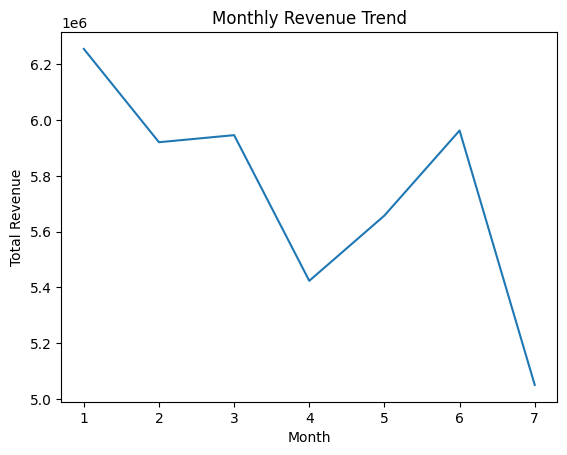

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_revenue['Month'], monthly_revenue['TotalRevenue'])
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.show()


In [ ]:
# products revenue
top_products = (
    df.groupby('MobileModel')['TotalRevenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


,TotalRevenue
MobileModel,
huge,282863.97
down,271953.40
explain,260694.34
wear,242293.06
many,234623.02
fly,233555.11
decade,221580.18
statement,212728.17
one,209814.59


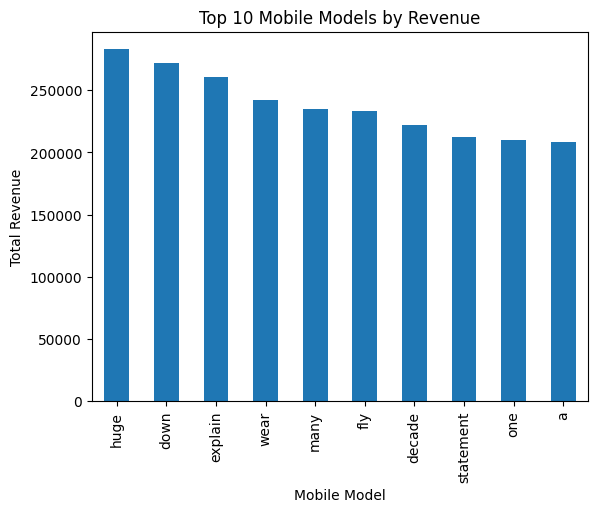

In [ ]:
# top_ products by revenue
top_products.plot(kind='bar')
plt.xlabel('Mobile Model')
plt.ylabel('Total Revenue')
plt.title('Top 10 Mobile Models by Revenue')
plt.show()

In [ ]:
# top regions by revenue
top_regions = (
    df.groupby('Location')['TotalRevenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_regions


,TotalRevenue
Location,
Lake Amanda,185827.20
Danielport,184981.62
Allisonburgh,175075.52
Port Andrew,166146.74
West Stephen,160902.40
New Kimberly,151758.78
West Jennifer,144742.45
Lake Jessica,144246.83
Michaelland,142698.60


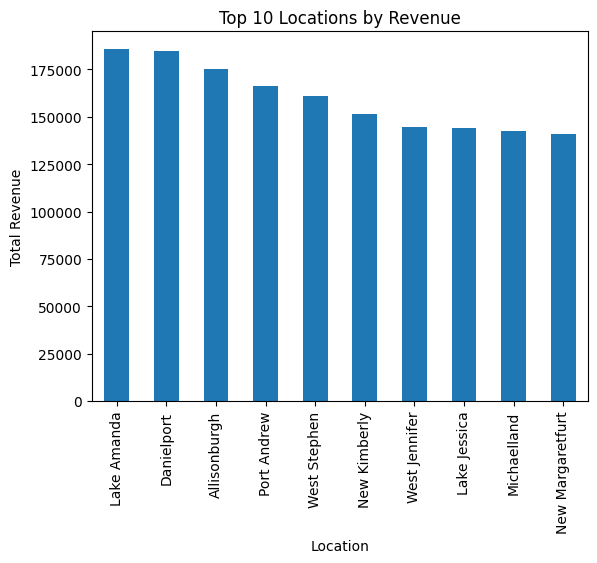

In [ ]:
top_regions.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.title('Top 10 Locations by Revenue')
plt.show()


In [ ]:
yearly_revenue = (
    df.groupby('Year')['TotalRevenue']
    .sum()
    .reset_index()
)

yearly_revenue


,Year,TotalRevenue
0,2024,40218445.04


In [ ]:
monthly_revenue['TimeIndex'] = range(len(monthly_revenue))
monthly_revenue


,Year,Month,TotalRevenue,TimeIndex
0,2024,1,6255585.41,0
1,2024,2,5920997.18,1
2,2024,3,5946336.12,2
3,2024,4,5423932.09,3
4,2024,5,5658005.29,4
5,2024,6,5963010.33,5
6,2024,7,5050578.62,6


In [ ]:
X = monthly_revenue[['TimeIndex']]   # Independent variable
y = monthly_revenue['TotalRevenue']  # Dependent variable


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
# future prediction for next 3 months
future_time = pd.DataFrame({
    'TimeIndex': [
        len(monthly_revenue),
        len(monthly_revenue) + 1,
        len(monthly_revenue) + 2
    ]
})

future_forecast = model.predict(future_time)
future_forecast


array([5199874.30571429, 5063469.845     , 4927065.38428571])

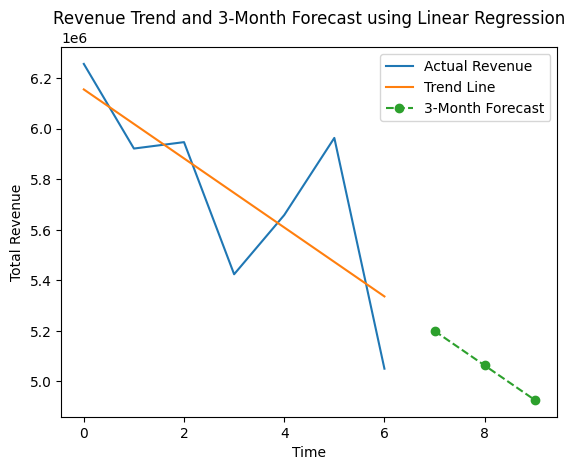

In [ ]:
# Plot historical revenue
plt.figure()
plt.plot(
    monthly_revenue['TimeIndex'],
    y,
    label='Actual Revenue'
)

# Plot trend line (historical)
plt.plot(
    monthly_revenue['TimeIndex'],
    model.predict(X),
    label='Trend Line'
)

# Plot future forecast
plt.plot(
    future_time['TimeIndex'],
    future_forecast,
    linestyle='--',
    marker='o',
    label='3-Month Forecast'
)

plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.title('Revenue Trend and 3-Month Forecast using Linear Regression')
plt.legend()
plt.show()

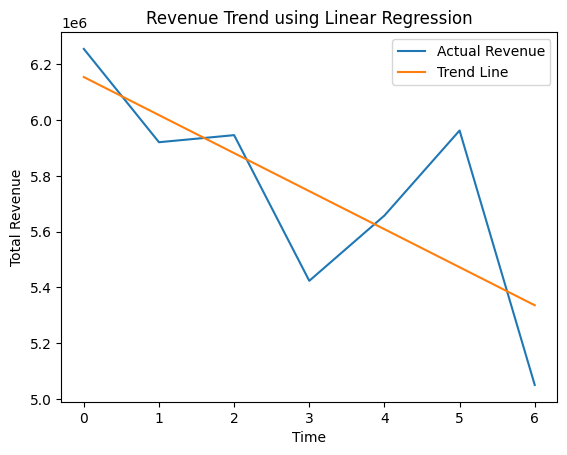

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_revenue['TimeIndex'], y, label='Actual Revenue')
plt.plot(monthly_revenue['TimeIndex'], model.predict(X), label='Trend Line')
plt.xlabel('Time')
plt.ylabel('Total Revenue')
plt.title('Revenue Trend using Linear Regression')
plt.legend()
plt.show()


In [ ]:
# Save the cleaned main data
df.to_csv("cleaned_mobile_sales.csv", index=False)

# Save the forecasting results for visualization
# Creating a dataframe for the forecast to plot in BI
forecast_df = pd.DataFrame({
    'TimeIndex': future_time['TimeIndex'],
    'ForecastedRevenue': future_forecast
})
forecast_df.to_csv("revenue_forecast1.csv", index=False)

In [ ]:
# power bi file

#  Prepare the History part
history = monthly_revenue[['TimeIndex', 'TotalRevenue']].copy()
history.rename(columns={'TotalRevenue': 'ActualRevenue'}, inplace=True)

#  Prepare the Forecast part
forecast_df = pd.DataFrame({
    'TimeIndex': future_time['TimeIndex'],
    'ForecastedRevenue': future_forecast
})

#  Combine them into one 'Bridge' file
combined_line_data = pd.concat([history, forecast_df], ignore_index=True)
combined_line_data.to_csv("powerbi_ex1.csv", index=False)